In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


We have successfully imported Pandas for data manipulation and Matplotlib/Seaborn for visualizations.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving netflix.csv to netflix.csv


In [ ]:
df = pd.read_csv('netflix.csv')

In [ ]:
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,12/15/2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,3/1/2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2/25/2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,11/24/2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,12/22/2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


We have successfully loaded the Netflix Movies dataset and previewed the first few rows.

In [ ]:
print(df.isnull().sum())


Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64


In [ ]:
print(df.columns)


Index(['release_date', 'title', 'overview', 'popularity', 'vote_count',
       'vote_average', 'original_language', 'genre', 'poster_url',
       'release_year', 'year_group'],
      dtype='object')


Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')


<ipython-input-12-34563f903574>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_exploded['genre'], order=df_exploded['genre'].value_counts().index[:10], palette='coolwarm')


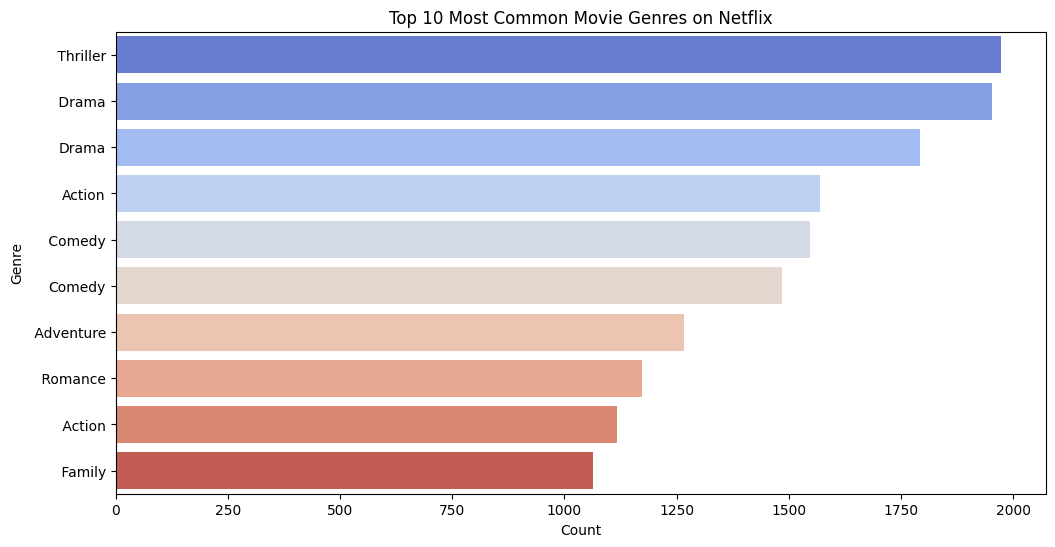

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the column name is correct
print(df_exploded.columns)

# Ensure 'genre' column is in lowercase (if dataset uses lowercase)
if 'Genre' in df_exploded.columns:
    df_exploded.rename(columns={'Genre': 'genre'}, inplace=True)

# Check for null values
df_exploded.dropna(subset=['genre'], inplace=True)

# Reset index to fix duplicate labels
df_exploded = df_exploded.reset_index(drop=True)

# Generate the countplot
plt.figure(figsize=(12,6))
sns.countplot(y=df_exploded['genre'], order=df_exploded['genre'].value_counts().index[:10], palette='coolwarm')
plt.title("Top 10 Most Common Movie Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


This bar chart shows the top 10 most common movie genres on Netflix.

In [ ]:
# Convert 'vote_average' to numeric, coercing errors
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')

# Drop rows where 'vote_average' is NaN
df = df.dropna(subset=['vote_average'])

# Find movie with highest vote average
highest_voted_movie = df.loc[df['vote_average'].idxmax(), ['title', 'genre', 'vote_average']]

print(f"The highest-rated movie on Netflix is '{highest_voted_movie['title']}' with a vote average of {highest_voted_movie['vote_average']}. Its genre is {highest_voted_movie['genre']}.")


The highest-rated movie on Netflix is 'Kung Fu Master Huo Yuanjia' with a vote average of 10.0. Its genre is ['Action', ' Drama'].


The most popular movie on Netflix is 'Spider-Man: No Way Home' with a popularity score of 5083.954. Its genre is ['Action', ' Adventure', ' Science Fiction'].


<ipython-input-35-2ecc566a9705>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[most_popular_movie['title']], y=[most_popular_movie['popularity']], palette='coolwarm')


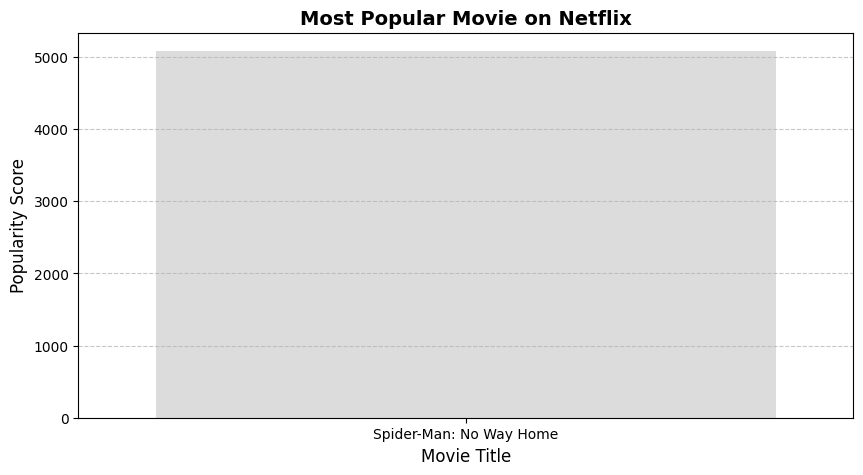

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'popularity' is numeric
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

# Drop NaN values in 'popularity'
df = df.dropna(subset=['popularity'])

# Find the most popular movie
most_popular_movie = df.loc[df['popularity'].idxmax(), ['title', 'genre', 'popularity']]

# Print the result
print(f"The most popular movie on Netflix is '{most_popular_movie['title']}' with a popularity score of {most_popular_movie['popularity']}. Its genre is {most_popular_movie['genre']}.")

# Improved Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=[most_popular_movie['title']], y=[most_popular_movie['popularity']], palette='coolwarm')

# Styling
plt.xlabel("Movie Title", fontsize=12)
plt.ylabel("Popularity Score", fontsize=12)
plt.title("Most Popular Movie on Netflix", fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


The most popular movie on Netflix

🎬 The least popular movie on Netflix is 'The United States vs. Billie Holiday' with a popularity score of 13.354. Genre: ['Music', ' Drama', ' History'].


<ipython-input-38-98d0c872b076>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[least_popular_movie['title']], y=[least_popular_movie['popularity']], palette='coolwarm')


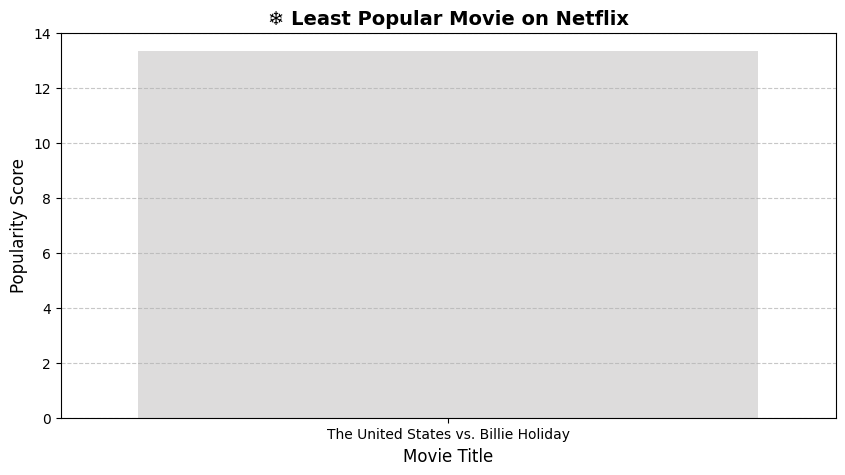

In [ ]:
# Find the least popular movie
least_popular_movie = df.loc[df['popularity'].idxmin(), ['title', 'genre', 'popularity']]

# Print the result
print(f"🎬 The least popular movie on Netflix is '{least_popular_movie['title']}' with a popularity score of {least_popular_movie['popularity']}. Genre: {least_popular_movie['genre']}.")

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=[least_popular_movie['title']], y=[least_popular_movie['popularity']], palette='coolwarm')

# Styling
plt.xlabel("Movie Title", fontsize=12)
plt.ylabel("Popularity Score", fontsize=12)
plt.title("❄️ Least Popular Movie on Netflix", fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The least popular movie on Netflix



🌟 The highest-rated movie on Netflix is 'Kung Fu Master Huo Yuanjia' with a vote average of 10.0. Genre: ['Action', ' Drama'].


<ipython-input-39-d3c2f28d5dc8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[highest_voted_movie['title']], y=[highest_voted_movie['vote_average']], palette=[colors[2]])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


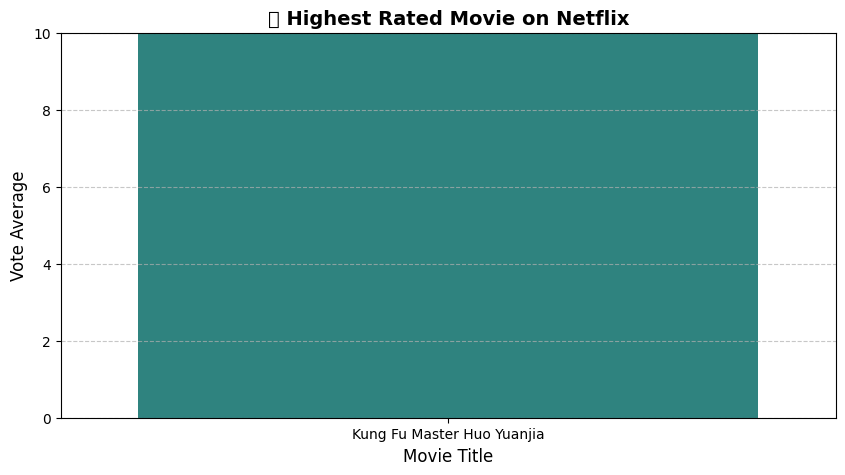

In [ ]:
# Find the highest-rated movie
highest_voted_movie = df.loc[df['vote_average'].idxmax(), ['title', 'genre', 'vote_average']]

# Print the result
print(f"🌟 The highest-rated movie on Netflix is '{highest_voted_movie['title']}' with a vote average of {highest_voted_movie['vote_average']}. Genre: {highest_voted_movie['genre']}.")

# Visualization
plt.figure(figsize=(10, 5))
colors = sns.color_palette("viridis", 5)  # Matching theme

sns.barplot(x=[highest_voted_movie['title']], y=[highest_voted_movie['vote_average']], palette=[colors[2]])

# Styling
plt.xlabel("Movie Title", fontsize=12)
plt.ylabel("Vote Average", fontsize=12)
plt.title("🏆 Highest Rated Movie on Netflix", fontsize=14, fontweight='bold')
plt.ylim(0, 10)  # Vote average scale
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Highest rated movie

<ipython-input-44-7eabf72c3759>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=movies_per_group.index, y=movies_per_group.values, palette=colors)


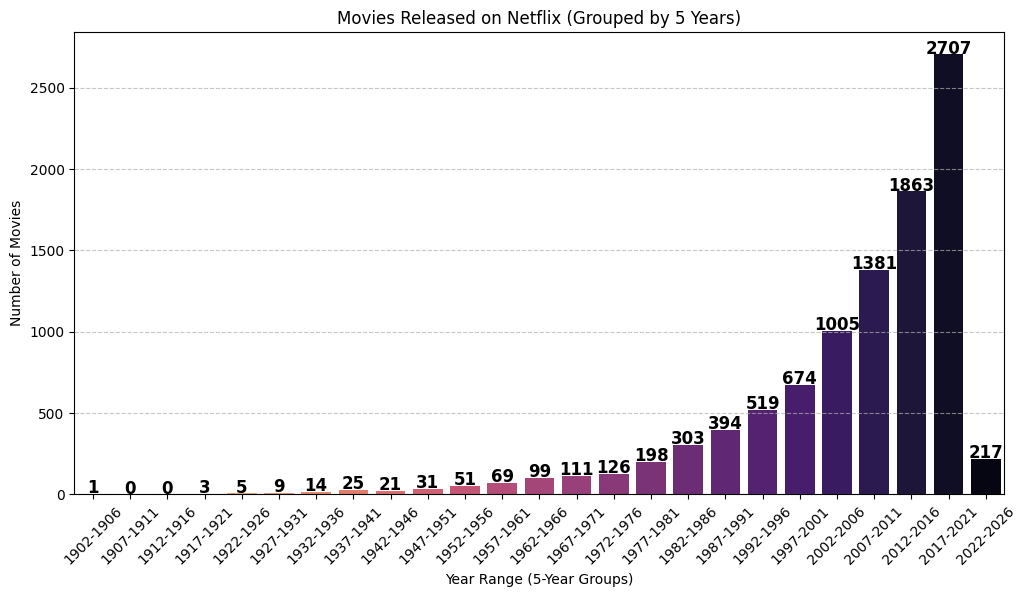

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract the year from 'release_date'
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Remove NaN values and filter valid years
df = df.dropna(subset=['release_year'])
df['release_year'] = df['release_year'].astype(int)

# Define 5-year bins
bins = list(range(df['release_year'].min(), df['release_year'].max() + 5, 5))
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

# Create groups
df['year_group'] = pd.cut(df['release_year'], bins=bins, labels=labels, right=False)

# Count movies in each group
movies_per_group = df['year_group'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
colors = sns.color_palette("magma_r", len(movies_per_group))
bars = sns.barplot(x=movies_per_group.index, y=movies_per_group.values, palette=colors)

# Add value labels directly above bars (clear and readable)
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5,  # Placing just above the bar
             f'{int(height)}', ha='center', fontsize=12, fontweight='bold', color='black')

# Styling
plt.xlabel("Year Range (5-Year Groups)")
plt.ylabel("Number of Movies")
plt.title("Movies Released on Netflix (Grouped by 5 Years)")
plt.xticks(rotation=45)  # Tilt x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Year 2017-2021 had the highest number of movies releases, possibly due to increased content production.

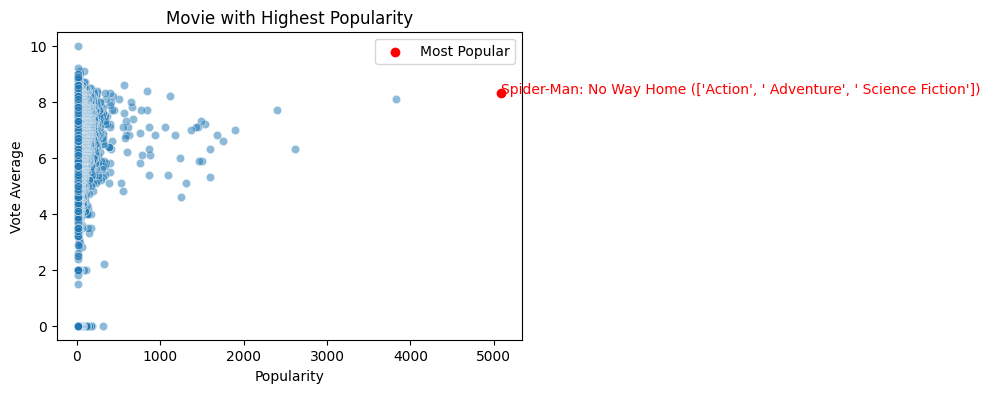

In [ ]:
top_popularity_movie = df.loc[df['popularity'].idxmax()]
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['popularity'], y=df['vote_average'], alpha=0.5)
plt.scatter(top_popularity_movie['popularity'], top_popularity_movie['vote_average'], color='red', label="Most Popular")
plt.annotate(f"{top_popularity_movie['title']} ({top_popularity_movie['genre']})",
             (top_popularity_movie['popularity'], top_popularity_movie['vote_average']), fontsize=10, color='red')
plt.title("Movie with Highest Popularity")
plt.xlabel("Popularity")
plt.ylabel("Vote Average")
plt.legend()
plt.show()

This Movie  is the most popular, showing a strong correlation between popularity and this genre.

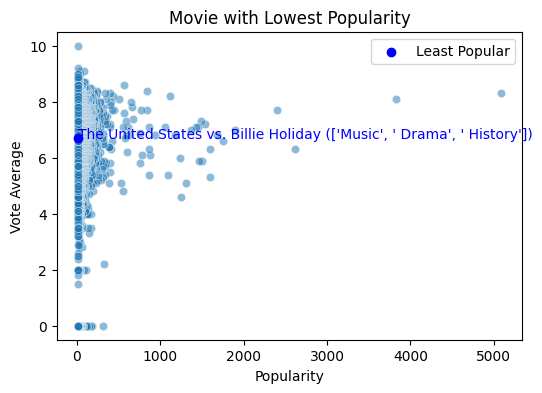

In [ ]:
low_popularity_movie = df.loc[df['popularity'].idxmin()]
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['popularity'], y=df['vote_average'], alpha=0.5)
plt.scatter(low_popularity_movie['popularity'], low_popularity_movie['vote_average'], color='blue', label="Least Popular")
plt.annotate(f"{low_popularity_movie['title']} ({low_popularity_movie['genre']})",
             (low_popularity_movie['popularity'], low_popularity_movie['vote_average']), fontsize=10, color='blue')
plt.title("Movie with Lowest Popularity")
plt.xlabel("Popularity")
plt.ylabel("Vote Average")
plt.legend()
plt.show()

This Movie has the lowest popularity, possibly due to niche appeal or lack of marketing.